In [2]:
from PIL import Image
import numpy as np
import scipy.misc as misc
import pandas as pd
import re
import scipy
import matplotlib.pyplot as plt
import os
import json
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import scipy.io

print(scipy.__version__)

0.19.1


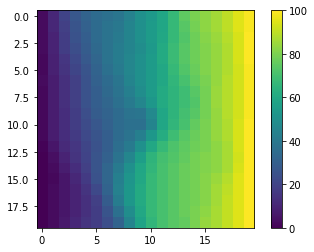

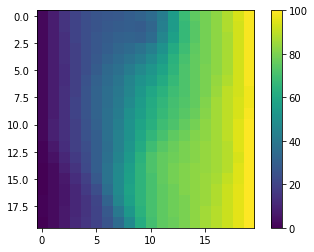

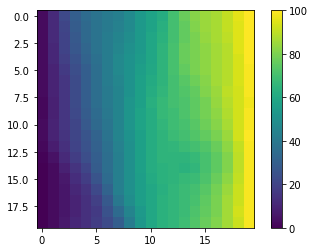

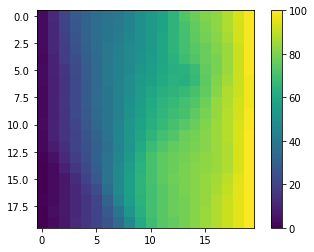

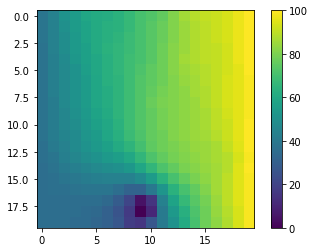

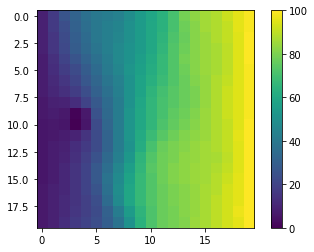

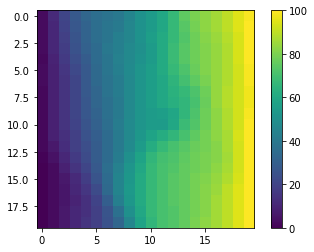

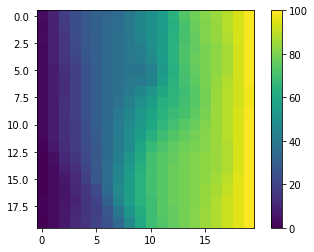

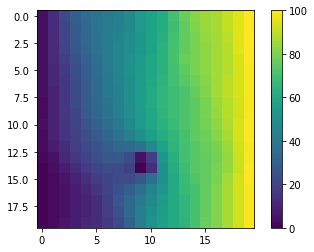

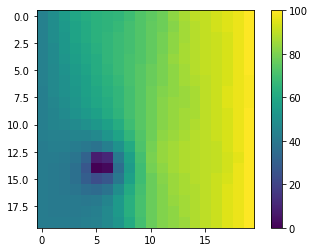

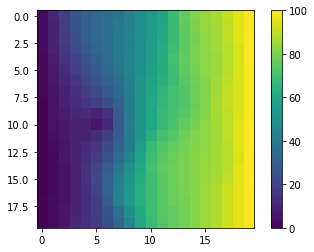

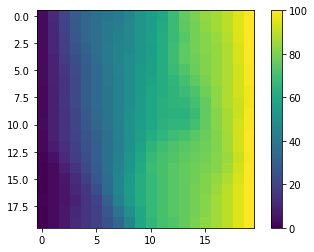

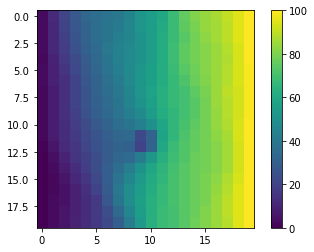

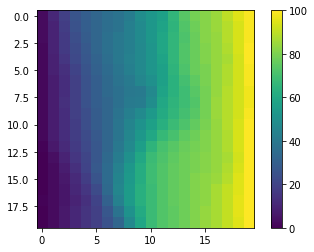

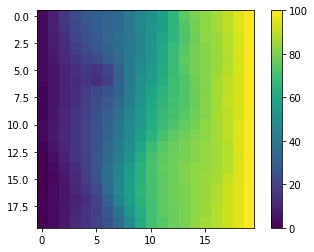

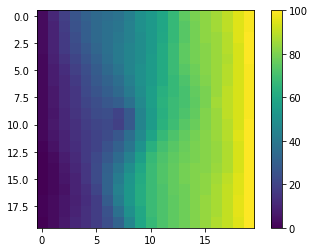

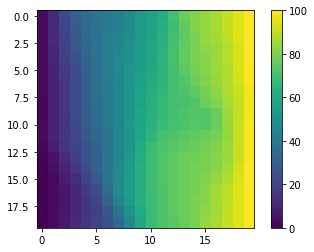

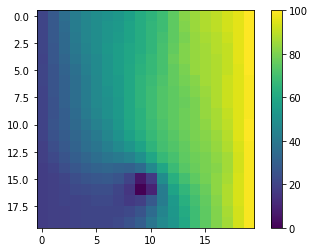

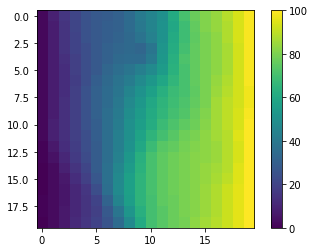

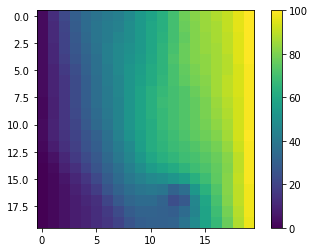

In [62]:
dir_path = r'H:\TONG_well_inverse'


is_image = False
is_tra = False
is_test = True


if is_tra:
    output_dir = r'H:\TONG_data_100_log10\annotations\training'
else:
    output_dir = r'H:\TONG_data_100_log10\annotations\validation'


if is_test:
    _start = 1
    _seqs = 2
    _num = 21
else:
    if is_tra:
        _start = 1
        _seqs = 901
        _num = 21
    else:
        _start = 901
        _seqs = 1001
        _num = 21
    
seqs = range(_start,_seqs)
seqs = ['F'+str(i).zfill(7) for i in seqs]

num = range(1,_num)
num = ['Stress'+str(i).zfill(2)+'.JSON' for i in num]

Stress_cnt = 100
material_cnt = 9

#         plt.imshow(np.uint8(dataset), cmap='gray')
#         plt.colorbar()
#         plt.show()


for seq in seqs:
    ims = []
    for i in num:
        filepath = os.path.join(dir_path, seq, i)        
        with open(filepath) as f:
            data = json.loads(f.read())['21*21']
            
        dataset = np.array(data).reshape([21,21])
                
        dim_y = []
        for i in range(np.shape(dataset)[0] ):
            dim_x = []
            for j in range(np.shape(dataset)[1]-1):
                mid = (dataset[i][j] + dataset[i][j+1])/2
                dim_x.append(mid)
            dim_y.append(dim_x)
        
        dataset = np.array(dim_y).transpose(1,0)
        
        dim_y = []
        for i in range(np.shape(dataset)[0] ):
            dim_x = []
            for j in range(np.shape(dataset)[1]-1):
                mid = (dataset[i][j] + dataset[i][j+1])/2
                dim_x.append(mid)
            dim_y.append(dim_x)
            
        
#         print(np.shape(dim_y))
    
#         plt.imshow(dim_y)
#         plt.colorbar()
#         plt.show()
        
        dataset = np.array(dim_y).transpose(1,0).flatten()
#         np.log10(dataset)

        scaler = MinMaxScaler(feature_range=(0, Stress_cnt))
        dataset = scaler.fit_transform(dataset)
        dataset = [int(round(i)) for i in dataset]
        dataset = np.array(dataset).reshape([20,20])
        
        
        ims.append(dataset)
    ims = np.array(ims)
#     ims = np.transpose(ims,(0, 1, 2))
    ims = np.transpose(ims,(1, 2, 0))
    
    for i in range(20):
        dataset=[]
        for j in range(20):
            for k in range(20):
                dataset.append(ims[j][k][i])
        dataset = np.array(dataset).reshape([20,20])
        
        
#         ims = np.transpose(ims,(2,0, 1))
#         dataset = ims[i][:][:]
        plt.imshow(dataset)
        plt.colorbar()
        plt.show()
    
    
    
#     np.save(os.path.join(output_dir, seq, '_images'), ims)
    
    
    
#     with open(os.path.join(dir_path, seq, 'material.JSON')) as f:
#         data = json.loads(f.read())['20*20']
#     data = np.log10(data)
#     print(data)
#     scaler = MinMaxScaler(feature_range=(0, material_cnt))
#     dataset = scaler.fit_transform(data)
#     dataset = [int(round(i)) for i in dataset]
#     ims = np.array(dataset).reshape([20,20])
#     print(ims)
#     np.save(os.path.join(output_dir, seq+'_anno'), ims)
    
    



In [35]:


arr = [[[1,1,1],[2,2,2],[3,3,3]],[[4,4,4],[5,5,5],[6,6,6]], [[7,7,7],[8,8,8],[9,9,9]]]
arr = np.array(arr)
print(np.shape(arr))
print(arr[:][:][:])
# print(arr[2][0][0])


arr = np.transpose(arr, (1,2,0))
print(np.shape(arr))
print(arr[0][:][:])

# print('tran back')
# arr = np.transpose(arr, (1,2,0))
# print(np.shape(arr))
# print(arr[:][:][:])





(3, 3, 3)
[[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]]

 [[7 7 7]
  [8 8 8]
  [9 9 9]]]
(3, 3, 3)
[[1 4 7]
 [1 4 7]
 [1 4 7]]


In [51]:

arr=[]
for i in range(1,21):
    arr.append(np.zeros([20,20])+i)

arr = np.transpose(arr, (1,2,0))

dataset = []
for i in range(20):
#     dataset = arr[i][:][:]
#     dataset = arr[:][:][i]
#     dataset = arr.ndim((0,1))

    dataset=[]
    for j in range(20):
        for k in range(20):
            dataset.append(arr[j][k][i])


    print(dataset)
#     plt.imshow(dataset)
#     plt.colorbar()
#     plt.show()
    




# print(arr[0][0][0])




[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,